In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv("adult.data",skipinitialspace = True)

In [3]:
test = pd.read_csv("adult.test", skipinitialspace = True)

In [4]:
test.iloc[0][14]

'<=50K.'

In [5]:
test['target'].replace({'<=50K.':'<=50K','>50K.':'>50K'}, inplace = True)

In [6]:
df = pd.concat([train, test], ignore_index=True)

In [7]:
df


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
48838,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48842 non-null  object
 14  target          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [9]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


Let to get the view of columns which have missing values '?''

In [10]:
for i in range(15):
    print(df.iloc[:, i].value_counts()) 
    

36    1348
35    1337
33    1335
23    1329
31    1325
      ... 
88       6
85       5
87       3
89       2
86       1
Name: age, Length: 74, dtype: int64
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64
203488    21
120277    19
190290    19
125892    18
126569    18
          ..
286983     1
185942     1
234220     1
214706     1
350977     1
Name: fnlwgt, Length: 28523, dtype: int64
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64
9     15784


In [11]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
48838,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [12]:
df['workclass'].replace({'?': 'Private'}, inplace = True)
# df['occupation'].replace({'?': 'Prof-specialty'}, inplace = True)
df.drop(df.index[(df.occupation == '?')], inplace = True)
df['native-country'].replace({'?': 'United-States'}, inplace = True)

In [13]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,33,Private,245211,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [14]:
# df['']

(array([    0.,  2070., 11173., 12616., 10499.,  6368.,  2566.,   594.,
          100.,    47.]),
 array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100]),
 <BarContainer object of 10 artists>)

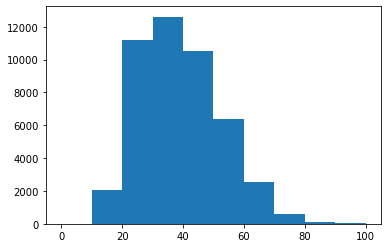

In [15]:
plt.hist(x = 'age', data = df, bins = [0, 10, 20, 30, 40,50,60,70, 80,90,100])

([<matplotlib.patches.Wedge at 0x28915572fd0>,
 [Text(-1.488577033148477, 1.6199192623037972, 'Private'),
  Text(0.3919451254600065, -2.164804614423237, 'Self-emp-not-inc'),
  Text(1.3431183821005988, -1.742421594122235, 'Local-gov'),
  Text(1.8582403385600315, -1.1776853757045216, 'State-gov'),
  Text(2.0924310336486087, -0.6795089178400943, 'Self-emp-inc'),
  Text(2.1888780117425846, -0.2209367549997755, 'Federal-gov'),
  Text(2.1999977406608004, -0.0031529489965525003, 'Without-pay')],
 [Text(-0.8119511089900782, 0.8835923248929802, '73.66'),
  Text(0.2137882502509126, -1.180802516958129, '8.39'),
  Text(0.7326100266003266, -0.950411778612128, '6.81'),
  Text(1.0135856392145626, -0.6423738412933753, '4.30'),
  Text(1.1413260183537863, -0.37064122791277865, '3.68'),
  Text(1.1939334609505006, -0.1205109572726048, '3.11'),
  Text(1.1999987676331636, -0.001719790361755909, '0.05')])

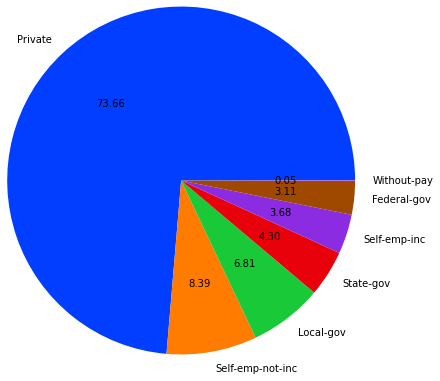

In [16]:
palette_color = sns.color_palette('bright')
plt.pie(df['workclass'].value_counts().values.tolist(), labels = df['workclass'].value_counts().index.tolist(), colors=palette_color, radius = 2, autopct='%1.2f')

<AxesSubplot:xlabel='race', ylabel='count'>

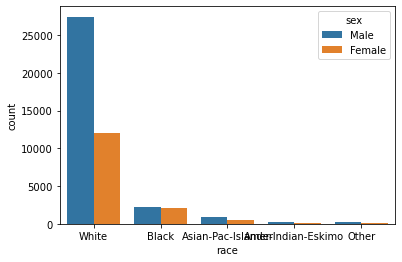

In [17]:
sns.countplot(x = 'race', hue='sex', data = df)

([<matplotlib.patches.Wedge at 0x289160a0880>,
 [Text(1.1480531035666228, 1.8766923219832936, 'HS-grad'),
  Text(-2.0149408901315136, 0.8831835648810636, 'Some-college'),
  Text(-1.5292190050374292, -1.5816096973123097, 'Bachelors'),
  Text(-0.1349683251370062, -2.195855995098429, 'Masters'),
  Text(0.5450611100093735, -2.1314099526734296, 'Assoc-voc'),
  Text(1.0482897775648305, -1.9341893760056381, '11th'),
  Text(1.4379063517917963, -1.6650601561135285, 'Assoc-acdm'),
  Text(1.7249993638736145, -1.3654219840897632, '10th'),
  Text(1.9010505533713857, -1.1072519105995475, '7th-8th'),
  Text(2.0136730447452797, -0.8860704649553984, 'Prof-school'),
  Text(2.0935411688236467, -0.6760808934147748, '9th'),
  Text(2.1447435035767355, -0.48997479921460374, '12th'),
  Text(2.1771002612706836, -0.3165982507455191, 'Doctorate'),
  Text(2.1941149509943276, -0.1608091471999018, '5th-6th'),
  Text(2.199279566840659, -0.05629730790334562, '1st-4th'),
  Text(2.1999726974147102, -0.01096041193770212

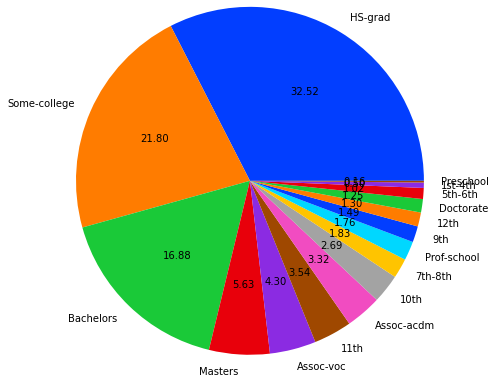

In [18]:
palette_color = sns.color_palette('bright')
plt.pie(df['education'].value_counts().values.tolist(), labels = df['education'].value_counts().index.tolist(), colors=palette_color, radius = 2, autopct='%1.2f')

In [19]:
working_hours_by_state = df[['native-country','hours-per-week']].groupby('native-country',as_index=True, sort=True).mean()


In [20]:
working_hours_by_state.sort_values(by = 'hours-per-week', ascending = False)

,hours-per-week
native-country,
Greece,46.897959
Thailand,45.827586
South,44.851485
Iran,43.767857
France,43.638889
England,42.924370
Ireland,42.500000
Japan,42.415730
Portugal,42.338710


In [21]:
df2 = df[['occupation','sex']].groupby('occupation',as_index=True).value_counts()

df2 = df2.groupby(level = 0).apply(lambda x: 100 * x / x.sum()).astype('int64')
df2.sort_index(level=1, ascending = False).sort_values(ascending = False)



occupation         sex   
Armed-Forces       Male      100
Transport-moving   Male       94
Priv-house-serv    Female     94
Craft-repair       Male       94
Farming-fishing    Male       93
Protective-serv    Male       87
Handlers-cleaners  Male       87
Machine-op-inspct  Male       73
Exec-managerial    Male       71
Adm-clerical       Female     67
Sales              Male       64
Prof-specialty     Male       63
Tech-support       Male       61
Other-service      Female     54
                   Male       45
Tech-support       Female     38
Prof-specialty     Female     36
Sales              Female     35
Adm-clerical       Male       32
Exec-managerial    Female     28
Machine-op-inspct  Female     26
Protective-serv    Female     12
Handlers-cleaners  Female     12
Farming-fishing    Female      6
Priv-house-serv    Male        5
Transport-moving   Female      5
Craft-repair       Female      5
dtype: int64

In [22]:

df['target'].replace({'<=50K': 0,'>50K':1}, inplace = True)

In [23]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,33,Private,245211,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,0
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,0
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,0
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,0


In [24]:
X = df.iloc[:, 0:14]
X

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,33,Private,245211,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States


In [25]:
y = df.iloc[:, 14]
y

0        0
1        0
2        0
3        0
4        0
        ..
48836    0
48837    0
48839    0
48840    0
48841    1
Name: target, Length: 46033, dtype: int64

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.25, random_state=0)

In [27]:
df[['education','education-num']].drop_duplicates().sort_values('education-num',ascending = False)


,education,education-num
20,Doctorate,16
52,Prof-school,15
5,Masters,14
0,Bachelors,13
13,Assoc-acdm,12
14,Assoc-voc,11
10,Some-college,10
2,HS-grad,9
415,12th,8
3,11th,7


In [28]:
X_train.drop(['education'],axis=1,inplace=True)

In [29]:
X_test.drop(['education'],axis=1,inplace=True)

In [30]:
def target_encode(attribute,target):
    X_train_copy = X_train.copy()
    X_train_copy['target'] = target
    encoding_map = {}
    unique_values = X_train_copy[attribute].unique()
    for value in unique_values:
        encoding_map[value] = round(X_train_copy[X_train_copy[attribute] == value]['target'].mean(),2)
        
    return encoding_map

In [31]:
for attribute in ['workclass','marital-status','occupation','relationship','native-country']:
    encoding = target_encode(attribute,y_train)
    X_train[attribute] = X_train[attribute].map(encoding)
    X_test[attribute] = X_test[attribute].map(encoding)

In [32]:
X_train

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
3708,36,0.22,160120,9,0.45,0.14,0.46,Asian-Pac-Islander,Male,0,0,40,0.10
15553,41,0.22,166662,15,0.45,0.48,0.46,White,Male,0,0,50,0.25
618,52,0.55,51048,13,0.45,0.27,0.46,White,Male,0,0,55,0.25
39998,41,0.22,145441,9,0.45,0.13,0.46,White,Male,0,0,40,0.25
37711,51,0.22,277471,9,0.45,0.23,0.46,White,Male,0,0,40,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22514,39,0.30,112284,14,0.11,0.44,0.11,White,Female,0,0,40,0.25
48696,26,0.22,320465,9,0.05,0.04,0.11,Black,Male,0,0,40,0.25
45198,62,0.22,217434,13,0.45,0.27,0.46,White,Male,0,0,40,0.25
46205,42,0.22,100479,13,0.45,0.27,0.46,White,Male,0,0,40,0.25


In [33]:
X_train['race'].value_counts()

White                 29583
Black                  3275
Asian-Pac-Islander     1077
Amer-Indian-Eskimo      322
Other                   267
Name: race, dtype: int64

In [34]:
X_test

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
30148,56,0.22,151474,5,0.11,0.27,0.06,White,Female,0,0,40,0.25
30135,22,0.22,117747,10,0.05,0.23,0.04,Asian-Pac-Islander,Female,0,0,40,0.10
38063,40,0.22,121492,10,0.05,0.13,0.11,Black,Male,0,0,48,0.25
16739,45,0.22,1366120,11,0.11,0.04,0.11,White,Female,0,0,8,0.25
3066,20,0.22,283499,10,0.05,0.21,0.02,White,Male,0,0,30,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27433,29,0.22,187188,14,0.05,0.48,0.11,Asian-Pac-Islander,Male,0,0,60,0.25
40153,48,0.22,95388,10,0.05,0.48,0.11,Black,Female,0,0,40,0.25
15178,27,0.22,369522,9,0.05,0.13,0.02,White,Male,0,0,45,0.25
30598,41,0.22,29702,11,0.05,0.23,0.11,White,Male,0,0,30,0.25


In [35]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(handle_unknown='ignore')
X_train['race']=X_train['race'].astype('category')
X_test['race']= X_test['race'].astype('category')

X_train['sex']=X_train['sex'].astype('category')
X_test['sex']= X_test['sex'].astype('category')





In [36]:
X_train=X_train.reset_index(drop=True)
X_test=X_test.reset_index(drop=True)

In [37]:
def one_hot_encode(X_train,X_test,attribute):
    train_encodings = one_hot_encoder.fit_transform(X_train[[attribute]]).toarray()
    test_encodings = one_hot_encoder.transform(X_test[[attribute]]).toarray()
   
    train_encodings_df = pd.DataFrame(train_encodings,columns=X_train[attribute].unique())
    
    test_encodings_df = pd.DataFrame(test_encodings,columns=X_train[attribute].unique())
   
    X_train = X_train.join(train_encodings_df)
    
    X_test = X_test.join(test_encodings_df)
    
    X_train.drop(attribute,axis=1,inplace=True)
    X_test.drop(attribute,axis=1,inplace=True)
    return X_train,X_test

In [38]:
for i in ['race','sex']:
    X_train,X_test = one_hot_encode(X_train,X_test,i)

In [39]:
X_train.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,capital-gain,capital-loss,hours-per-week,native-country,Asian-Pac-Islander,White,Black,Amer-Indian-Eskimo,Other,Male,Female
0,36,0.22,160120,9,0.45,0.14,0.46,0,0,40,0.10,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,41,0.22,166662,15,0.45,0.48,0.46,0,0,50,0.25,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,52,0.55,51048,13,0.45,0.27,0.46,0,0,55,0.25,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,41,0.22,145441,9,0.45,0.13,0.46,0,0,40,0.25,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,51,0.22,277471,9,0.45,0.23,0.46,0,0,40,0.25,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [40]:
X_test.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,capital-gain,capital-loss,hours-per-week,native-country,Asian-Pac-Islander,White,Black,Amer-Indian-Eskimo,Other,Male,Female
0,56,0.22,151474,5,0.11,0.27,0.06,0,0,40,0.25,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,22,0.22,117747,10,0.05,0.23,0.04,0,0,40,0.10,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,40,0.22,121492,10,0.05,0.13,0.11,0,0,48,0.25,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,45,0.22,1366120,11,0.11,0.04,0.11,0,0,8,0.25,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,20,0.22,283499,10,0.05,0.21,0.02,0,0,30,0.25,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [42]:
scaled_X_train = scaler.fit_transform(X_train)

X_train = pd.DataFrame(scaled_X_train,columns=X_train.columns)

In [43]:
scaled_X_test = scaler.transform(X_test)
X_test = pd.DataFrame(scaled_X_test,columns=X_test.columns)
X_test.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,capital-gain,capital-loss,hours-per-week,native-country,Asian-Pac-Islander,White,Black,Amer-Indian-Eskimo,Other,Male,Female
0,1.318743,-0.430623,-0.359985,-1.994440,-0.719242,0.148273,-0.971480,-0.146226,-0.21944,-0.081194,0.122557,-0.097029,-0.179444,-0.323733,-0.088284,0.408683,1.447006,-1.447006
1,-1.253596,-0.430623,-0.679590,-0.047726,-1.034247,-0.122784,-1.073339,-0.146226,-0.21944,-0.081194,-3.415016,-0.097029,5.572765,-0.323733,-0.088284,-2.446886,1.447006,-1.447006
2,0.108230,-0.430623,-0.644101,-0.047726,-1.034247,-0.800424,-0.716832,-0.146226,-0.21944,0.586063,0.122557,-0.097029,-0.179444,3.088961,-0.088284,-2.446886,-0.691082,0.691082
3,0.486516,-0.430623,11.150253,0.341617,-0.719242,-1.410300,-0.716832,-0.146226,-0.21944,-2.750223,0.122557,-0.097029,-0.179444,-0.323733,-0.088284,0.408683,1.447006,-1.447006
4,-1.404910,-0.430623,0.891111,-0.047726,-1.034247,-0.258312,-1.175198,-0.146226,-0.21944,-0.915266,0.122557,-0.097029,-0.179444,-0.323733,-0.088284,0.408683,-0.691082,0.691082


In [44]:
X_train, X_test, y_train, y_test = X_train.to_numpy(), X_test.to_numpy(), y_train.to_numpy(), y_test.to_numpy()

In [45]:
y_train

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

# Time to  build a model

## LOGISTIC REGRESSION

In [46]:

from sklearn.linear_model import LogisticRegression


logistic_regressor = LogisticRegression()
lg_clf = logistic_regressor.fit(X_train,y_train)
lg_clf.fit(X_train, y_train)
lg_clf.predict(X_test)

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [47]:
lg_clf.score(X_test, y_test)

0.8459466504474759

In [48]:
count = 0
for i in range(len(X_test)):
    if lg_clf.predict([X_test[i]])[0] == y_test[i]:
        count += 1
print("Количество правильно угаданных:", count,"\nКоличество неправильно угаданных:", len(X_test) - count)


# X_test[0].value() 

Количество правильно угаданных: 9736 
Количество неправильно угаданных: 1773


In [49]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, lg_clf.predict(X_test))

array([[8017,  630],
       [1143, 1719]], dtype=int64)

## Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict

forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(X_train, y_train)
forest_clf.predict(X_test)


array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [51]:
forest_clf.score(X_test, y_test)

0.8565470501346772

In [52]:
count = 0
for i in range(len(X_test)):
    if forest_clf.predict([X_test[i]])[0] == y_test[i]:
        count += 1
print("Количество правильно угаданных:", count,"\nКоличество неправильно угаданных:", len(X_test) - count)

Количество правильно угаданных: 9858 
Количество неправильно угаданных: 1651


In [53]:
confusion_matrix(y_test, forest_clf.predict(X_test))

array([[8033,  614],
       [1037, 1825]], dtype=int64)

## Decision Tree

In [54]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth=9)
tree_clf.fit(X_train, y_train)
tree_clf.predict(X_test)

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [55]:
tree_clf.score(X_test, y_test)

0.8582848205752021

In [56]:
count = 0
for i in range(len(X_test)):
    if tree_clf.predict([X_test[i]])[0] == y_test[i]:
        count += 1
print("Количество правильно угаданных:", count,"\nКоличество неправильно угаданных:", len(X_test) - count)

Количество правильно угаданных: 9878 
Количество неправильно угаданных: 1631


In [57]:
confusion_matrix(y_test, tree_clf.predict(X_test))

array([[8105,  542],
       [1089, 1773]], dtype=int64)

## KNeighbors Classifier

In [58]:
from sklearn.neighbors import KNeighborsClassifier
neigh_clf = KNeighborsClassifier(n_neighbors=25)
neigh_clf.fit(X_train, y_train)
neigh_clf.predict(X_test)

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [59]:
neigh_clf.score(X_test, y_test)

0.8449908767051872

In [60]:
count = 0
for i in range(len(X_test)):
    if neigh_clf.predict([X_test[i]])[0] == y_test[i]:
        count += 1
print("Количество правильно угаданных:", count,"\nКоличество неправильно угаданных:", len(X_test) - count)

Количество правильно угаданных: 9725 
Количество неправильно угаданных: 1784


In [61]:
confusion_matrix(y_test, neigh_clf.predict(X_test))

array([[7983,  664],
       [1120, 1742]], dtype=int64)

## Result

## Score of prediction using several classification models:
### Logistic regression - 0.8459466504474759
### Random Forest - 0.8565470501346772
### Decision Tree - 0.8582848205752021
### KNeighbors Classifier - 0.8449908767051872